# EJ 1

In [137]:
#Importamos librerias necesarias
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [138]:
def create_gauss_filter(h, w, ksize = 1, sigma = 5):
    # canvas negro para aplicar el filtro
    canvas = np.zeros((h, w))
    # creo un kernel gaussiano 
    nucleo_g = cv2.getGaussianKernel(ksize = ksize, sigma = sigma)
    filtro_g_cuadrado = nucleo_g * nucleo_g.T

    
    centro=(int(w/2), int(h/2))
    centro_g = (int(filtro_g_cuadrado.shape[1]/2), int(filtro_g_cuadrado.shape[0]/2))

    dy = (centro[1] - centro_g[1])
    dx = (centro[0] - centro_g[0])

    filtro_g = canvas.copy()
    filtro_g[dy:dy + filtro_g_cuadrado.shape[0], dx:dx + filtro_g_cuadrado.shape[1]] = filtro_g_cuadrado

    # Calculo la FFT del filtro creado y la desplazo al origen
    shifted_filter_fft = np.fft.fftshift(np.fft.fft2(filtro_g)) 

    return filtro_g, 20*np.log(np.abs(shifted_filter_fft))

In [139]:
img = cv2.imread('golazo.jpg', cv2.IMREAD_GRAYSCALE)
h, w = img.shape[0],img.shape[1]
filtro, filtro_tf = create_gauss_filter(h, w, ksize=min(img.shape[0],img.shape[1]), sigma=45)
filtro2, filtro_tf2 = create_gauss_filter(h, w, ksize=50, sigma=5)
filtro3, filtro_tf3 = create_gauss_filter(h, w, ksize=100, sigma=15)
filtro4, filtro_tf4 = create_gauss_filter(h, w, ksize=150, sigma=25)
filtro5, filtro_tf5 = create_gauss_filter(h, w, ksize=250, sigma=35)

In [140]:
min(img.shape[0],img.shape[1])

542

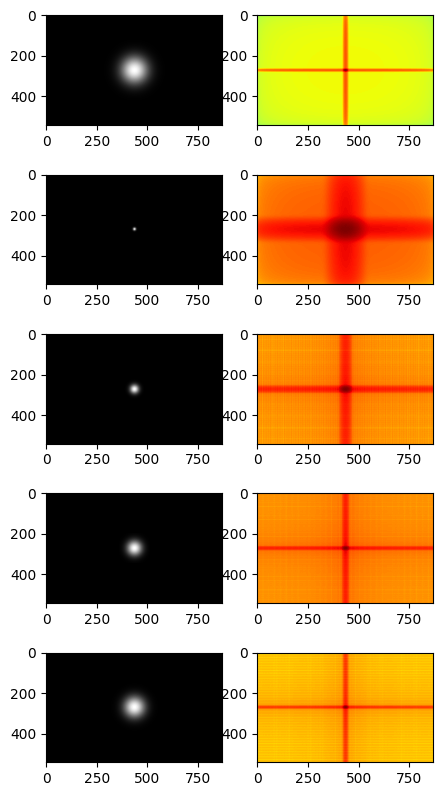

In [141]:
plt.figure(figsize=(5,10))
plt.subplot(5,2,1)
plt.imshow(filtro, cmap='gray')
plt.subplot(5,2,2)
plt.imshow(filtro_tf, cmap='jet')
plt.subplot(5,2,3)
plt.imshow(filtro2, cmap='gray')
plt.subplot(5,2,4)
plt.imshow(filtro_tf2, cmap='jet')
plt.subplot(5,2,5)
plt.imshow(filtro3, cmap='gray')
plt.subplot(5,2,6)
plt.imshow(filtro_tf3, cmap='jet')
plt.subplot(5,2,7)
plt.imshow(filtro4, cmap='gray')
plt.subplot(5,2,8)
plt.imshow(filtro_tf4, cmap='jet')
plt.subplot(5,2,9)
plt.imshow(filtro5, cmap='gray')
plt.subplot(5,2,10)
plt.imshow(filtro_tf5, cmap='jet')

In [142]:
# Calculo la fft de la imagen a procesar
shifted_fft = np.fft.fftshift(np.fft.fft2(img))

# Aplico cada uno de los filtros y hallo la antitransformada
f_ishift = np.fft.ifftshift(shifted_fft * filtro)
img_filtrada1 = np.real(np.fft.ifft2(f_ishift))
f_ishift = np.fft.ifftshift(shifted_fft * filtro2)
img_filtrada2 = np.real(np.fft.ifft2(f_ishift))
f_ishift = np.fft.ifftshift(shifted_fft * filtro3)
img_filtrada3 = np.real(np.fft.ifft2(f_ishift))
f_ishift = np.fft.ifftshift(shifted_fft * filtro4)
img_filtrada4 = np.real(np.fft.ifft2(f_ishift))
f_ishift = np.fft.ifftshift(shifted_fft * filtro5)
img_filtrada5 = np.real(np.fft.ifft2(f_ishift))



Text(0.5, 1.0, 'Filtro5: k_size: 250, sigma: 35')

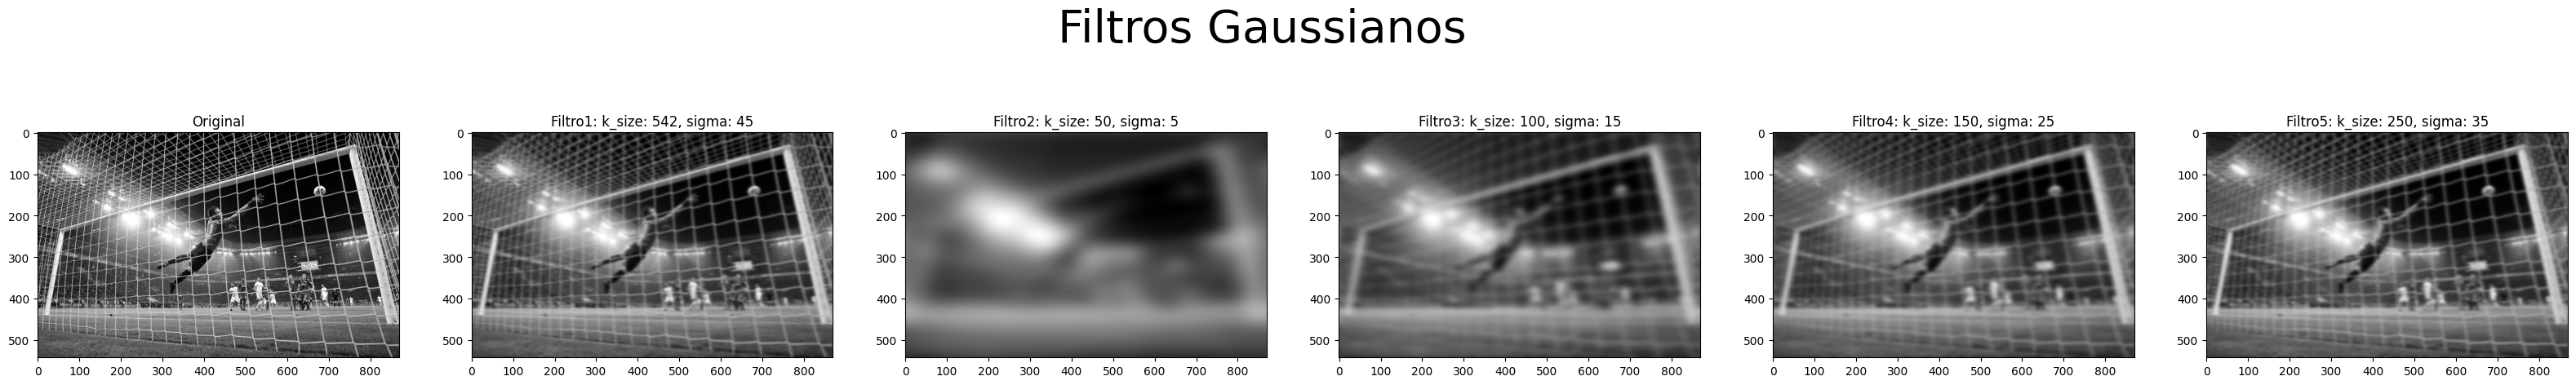

In [143]:
plt.figure(figsize=(40, 6))
plt.suptitle('Filtros Gaussianos',fontsize=40)

plt.subplot(1,6,1)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(1,6,2)
plt.imshow(img_filtrada1, cmap='gray')
plt.title('Filtro1: k_size: 542, sigma: 45')

plt.subplot(1,6,3)
plt.imshow(img_filtrada2, cmap='gray')
plt.title('Filtro2: k_size: 50, sigma: 5')

plt.subplot(1,6,4)
plt.imshow(img_filtrada3, cmap='gray')
plt.title('Filtro3: k_size: 100, sigma: 15')

plt.subplot(1,6,5)
plt.imshow(img_filtrada4, cmap='gray')
plt.title('Filtro4: k_size: 150, sigma: 25')

plt.subplot(1,6,6)
plt.imshow(img_filtrada5, cmap='gray')
plt.title('Filtro5: k_size: 250, sigma: 35')

# EJ 2

In [144]:
def imageQualityMeasure(image):
    fft = np.fft.fft2(image)
    shifted_fft = np.fft.fftshift(fft)
    AF=np.abs(shifted_fft)
    M=np.max(AF)
    thres=M/1000
    Th=AF[AF>thres].shape[0]
    return Th/(image.shape[0]*image.shape[1])

In [145]:
# Filtrado por convolución espacial
img_filtrada_esp = np.float64(cv2.GaussianBlur(img, ksize=(21, 21), sigmaX=45))
# Filtrado por convolución espectral
img_filtrada_frec = np.real(np.fft.ifft2(np.fft.ifftshift(np.fft.fftshift(np.fft.fft2(img)) * create_gauss_filter(img.shape[0],img.shape[1], ksize=21, sigma=45)[0])))

In [146]:
img=np.float64(img)
img_filtrada_esp=np.float64(img_filtrada_esp)
img_filtrada_frec=np.float64(img_filtrada_frec)*255

Text(0.5, 1.0, 'Filtrado Espectral')

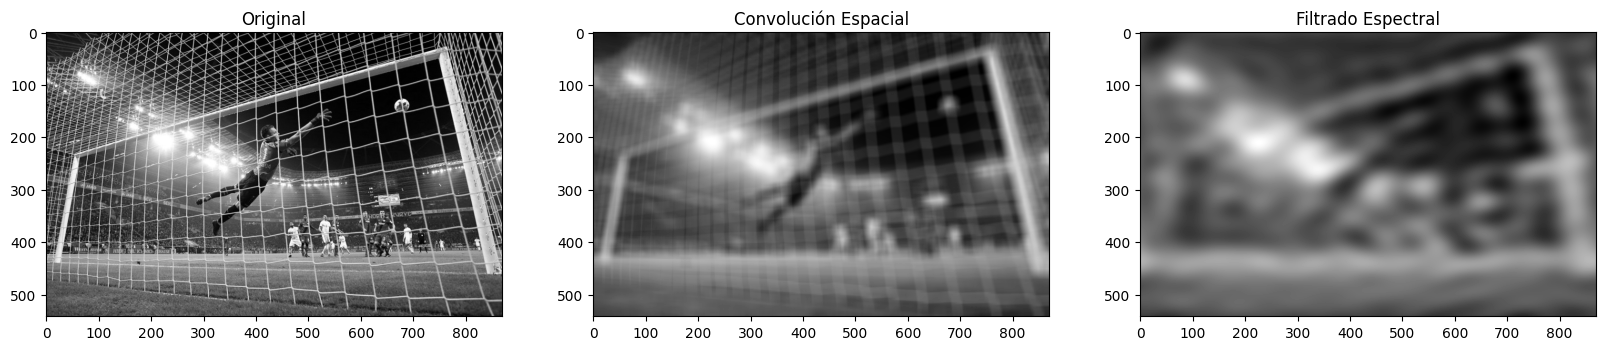

In [147]:
plt.figure(figsize=(20, 15))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(1,3,2)
plt.imshow(img_filtrada_esp, cmap='gray')
plt.title('Convolución Espacial')

plt.subplot(1,3,3)
plt.imshow(img_filtrada_frec, cmap='gray')
plt.title('Filtrado Espectral')

In [148]:
calidad_original = imageQualityMeasure(img)
calidad_conv = imageQualityMeasure(img_filtrada_esp)
calidad_dom_esp = imageQualityMeasure(img_filtrada_frec)

print(calidad_original, calidad_conv, calidad_dom_esp)

0.08013954277473809 0.004056919879543623 0.0009309920685413751


La imagen filtrada por convolucion tiene 10 veces mayor calidad segun el paper "Image Sharpness Measure for Blurred Images in Frequency Domain"

# EJ 3

## Grey level local variance 

In [152]:
def graylevellocalvariance(img,wx,wy):
    Lv=[]
    Lv_med=[]
    for i in range(wy,img.shape[0]-wy):
        for j in range(wx,img.shape[1]-wx):
            Lv_med = np.mean(img[int(i-wy/2):int(i+wy/2),int(j-wx/2):int(j+wx/2)])
            Lv_ij = img[int(i-wy/2):int(i+wy/2),int(j-wx/2):int(j+wx/2)]
            pot=np.mean(np.power((Lv_ij-Lv_med),2))
            Lv.append(pot)
    return np.mean(np.power(Lv-np.mean(Lv),2))

In [ ]:
calidad_original = graylevellocalvariance(img,15,15)
calidad_conv = graylevellocalvariance(img_filtrada_esp,15,15)
calidad_dom_esp = graylevellocalvariance(img_filtrada_frec,15,15)

print(calidad_original, calidad_conv, calidad_dom_esp)

Obtenemos las calidades evaluadas segun el algoritmo "Grey level local variance",
siendo el de la imagen filtrada por frecuencia menor al de la filtrada por convolución espacial para un mismo tamaño de kernel y sigma.
Esto es coherente con los scores que habíamos obtenido por el método anterior.